In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data  =  pd.read_csv("GlobalLandTemperaturesByMajorCity.csv", parse_dates=["dt"])

In [3]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [4]:
data.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             239177 non-null  datetime64[ns]
 1   AverageTemperature             228175 non-null  float64       
 2   AverageTemperatureUncertainty  228175 non-null  float64       
 3   City                           239177 non-null  object        
 4   Country                        239177 non-null  object        
 5   Latitude                       239177 non-null  object        
 6   Longitude                      239177 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 12.8+ MB


In [6]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [7]:
#data.to_pickle("data.pickle") #Büyük verilerin daha hızlı okunması için pickle olarak kaydediyoruz
#data.to_parquet("data.parquet")

In [8]:
data.shape

(239177, 7)

In [9]:
data.isna().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [10]:
data.isna().sum().sum()

22004

In [11]:
data.isna().sum() / data.shape[0] * 100

dt                               0.000000
AverageTemperature               4.599941
AverageTemperatureUncertainty    4.599941
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [12]:
data_prepared = data.dropna(axis = 0,how = "any")  #inplace=True yeni bir değişkene aktarma ihtiyacı kalmaz direkt kaydeder

In [13]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [14]:
data_prepared.shape

(228175, 7)

In [15]:
data_prepared.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [16]:
data_prepared.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [17]:
data_prepared[["City","Country"]] # çift parantezde dataframe olur tek parantezde series 

,City,Country
0,Abidjan,Côte D'Ivoire
1,Abidjan,Côte D'Ivoire
2,Abidjan,Côte D'Ivoire
3,Abidjan,Côte D'Ivoire
4,Abidjan,Côte D'Ivoire
...,...,...
239171,Xian,China
239172,Xian,China
239173,Xian,China
239174,Xian,China


In [18]:
data_prepared["Country"].value_counts() # Kaç tane o ülkeden olduğunu saydırıyor

China                                 34952
India                                 34627
Brazil                                12139
Turkey                                 9239
United States                          8237
Egypt                                  7550
Pakistan                               6490
Russia                                 6332
Canada                                 6282
Nigeria                                5200
Australia                              4138
Japan                                  4050
Colombia                               4003
Saudi Arabia                           3856
Indonesia                              3758
South Africa                           3746
Germany                                3166
United Kingdom                         3166
Spain                                  3166
Italy                                  3166
France                                 3166
Ukraine                                3166
Morocco                         

In [19]:
data_prepared["Country"].value_counts().shape

(49,)

In [20]:
data_prepared[(data_prepared["Country"] == "Turkey" ) | (data_prepared["Country"]=="Brazil")]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
198855,2013-04-01,26.651,0.202,Salvador,Brazil,13.66S,38.81W
198856,2013-05-01,25.757,0.548,Salvador,Brazil,13.66S,38.81W
198857,2013-06-01,25.007,0.936,Salvador,Brazil,13.66S,38.81W
198858,2013-07-01,24.419,0.555,Salvador,Brazil,13.66S,38.81W


In [21]:
data_prepared[(data_prepared["Country"] == "Turkey" ) & (data_prepared["AverageTemperature"]>20)]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
11900,1755-08-01,20.793,2.475,Ankara,Turkey,39.38N,33.29E
11910,1756-06-01,20.433,2.512,Ankara,Turkey,39.38N,33.29E
11911,1756-07-01,21.761,1.996,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
96611,2012-10-01,21.292,0.574,Izmir,Turkey,37.78N,26.44E
96618,2013-05-01,21.723,0.407,Izmir,Turkey,37.78N,26.44E
96619,2013-06-01,24.416,0.589,Izmir,Turkey,37.78N,26.44E
96620,2013-07-01,26.451,0.277,Izmir,Turkey,37.78N,26.44E


In [22]:
data_prepared[data_prepared["Country"].isin(["Turkey","Brazil","United States"])]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E
...,...,...,...,...,...,...,...
198855,2013-04-01,26.651,0.202,Salvador,Brazil,13.66S,38.81W
198856,2013-05-01,25.757,0.548,Salvador,Brazil,13.66S,38.81W
198857,2013-06-01,25.007,0.936,Salvador,Brazil,13.66S,38.81W
198858,2013-07-01,24.419,0.555,Salvador,Brazil,13.66S,38.81W


In [23]:
data_prepared[data_prepared["Country"].isin(["Turkey","Brazil","United States"])]["Country"].value_counts()

Brazil           12139
Turkey            9239
United States     8237
Name: Country, dtype: int64

In [24]:
data_selected = data_prepared[data_prepared["Country"].isin(["Turkey","Brazil","United States"])]

In [25]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [26]:
data_selected.groupby(by = "Country").mean()

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Brazil,22.847555,0.877419
Turkey,13.790998,1.391654
United States,11.257246,1.200292


In [27]:
data_selected.groupby(by = "Country").max()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude
Country,,,,,,
Brazil,2013-08-01,29.986,5.277,São Paulo,4.02S,47.50W
Turkey,2013-08-01,29.845,8.459,Izmir,40.99N,33.29E
United States,2013-09-01,29.141,10.193,New York,42.59N,87.27W


In [28]:
data_selected.groupby(by = "Country").agg(["min","mean","max"])

AverageTemperature                     \
                             min       mean     max   
Country                                               
Brazil                    13.536  22.847555  29.986   
Turkey                    -6.280  13.790998  29.845   
United States             -9.162  11.257246  29.141   

              AverageTemperatureUncertainty                    
                                        min      mean     max  
Country                                                        
Brazil                                0.040  0.877419   5.277  
Turkey                                0.062  1.391654   8.459  
United States                         0.075  1.200292  10.193

In [29]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [30]:
tr_avg_temps = data_selected[data_selected["Country"] == "Turkey"]["AverageTemperature"]
br_avg_temps = data_selected[data_selected["Country"] == "Brazil"]["AverageTemperature"]


<AxesSubplot:xlabel='AverageTemperature'>

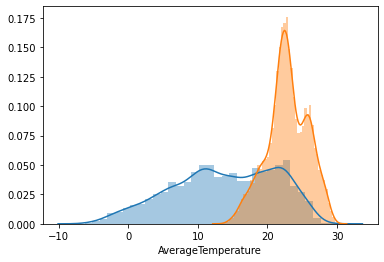

In [31]:
sns.distplot(tr_avg_temps) # seaborn kütüphanesinden bir fonksiyon dağılım grafiğini gösterir
sns.distplot(br_avg_temps)

In [32]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [33]:
data_selected["Country"].value_counts().index

Index(['Brazil', 'Turkey', 'United States'], dtype='object')

In [34]:
countries = data_selected["Country"].unique()

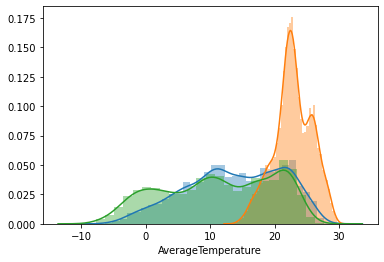

In [35]:
for country in countries:
    inLoop = data_selected[data_selected["Country"] == country]["AverageTemperature"]
    sns.distplot(inLoop)

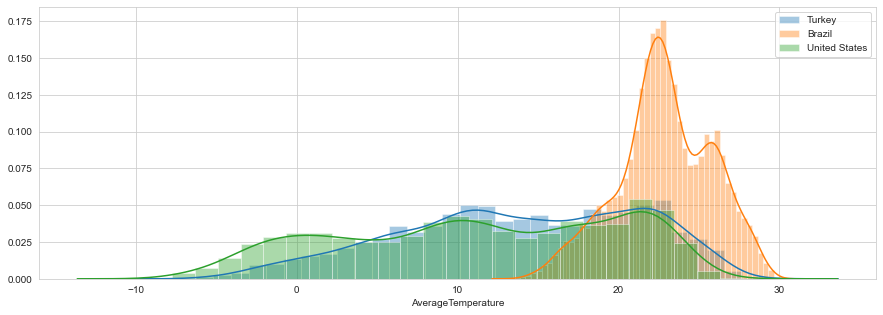

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,5))
countries = data_selected["Country"].unique()
for country in countries:
    inLoop = data_selected[data_selected["Country"] == country]["AverageTemperature"]
    sns.distplot(inLoop)
    
plt.legend(countries)

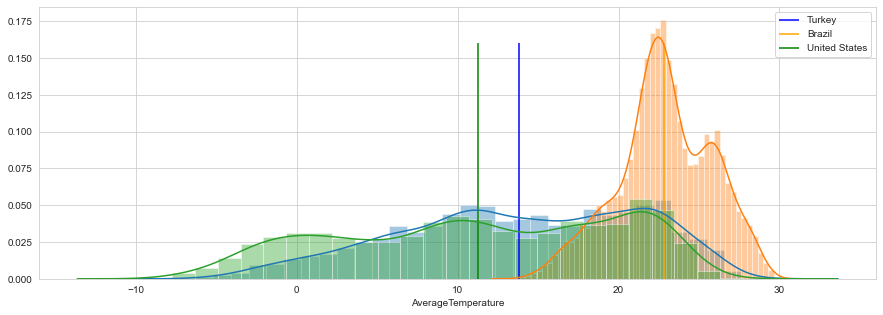

In [39]:
sns.set_style("whitegrid") # girdileri bu şekilde ekliyoruz
plt.figure(figsize = (15,5)) # boyutlar bu şekilde
countries = data_selected["Country"].unique()
colors = ["blue","orange","green"] # renge göre ortalama çizgisi koymak için açtık

for color,country in zip(colors,countries):# dönmesi için color değişkenini koyduk ülkeye göre versin
    inLoop = data_selected[data_selected["Country"] == country]["AverageTemperature"]
    sns.distplot(inLoop)
    ulke_mean = data_selected[data_selected["Country"] == country]["AverageTemperature"].mean()
    plt.vlines(ulke_mean,0,0.16,colors = color) # vertical lines anlamına gelir ortalamayı çizgi şeklinde göstermek amacıyla kullandık
    
    
plt.legend(countries)

In [40]:
### Tam otomatikleştirme

In [42]:
data_selected.columns[1:3]

Index(['AverageTemperature', 'AverageTemperatureUncertainty'], dtype='object')

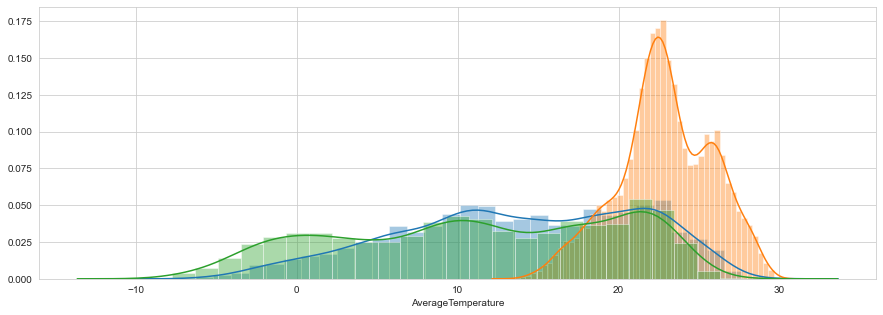

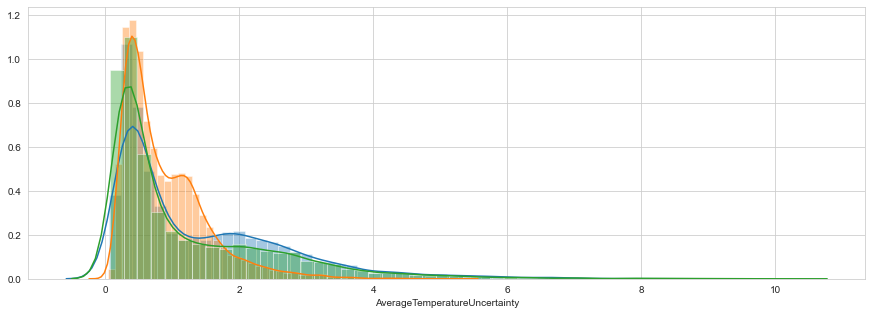

In [53]:
kolon = data_selected.columns[1:3]
ulke = data_selected["Country"].unique()

for kolon in kolonlar:
    plt.figure(figsize = (15,5))
    for ulke in ulkeler:
        sns.distplot(data_selected[data_selected["Country"] == ulke][kolon])
        
    plt.show()
        
        
    


In [54]:
#### scatterplot

In [55]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11893,1755-01-01,-3.657,4.084,Ankara,Turkey,39.38N,33.29E
11894,1755-02-01,-2.453,3.712,Ankara,Turkey,39.38N,33.29E
11895,1755-03-01,4.458,3.421,Ankara,Turkey,39.38N,33.29E
11898,1755-06-01,21.018,2.593,Ankara,Turkey,39.38N,33.29E
11899,1755-07-01,22.099,1.963,Ankara,Turkey,39.38N,33.29E


In [84]:
tr_data = data_selected[(data_selected["Country"] == "Turkey") & (data_selected["dt"]>"01.01.1900")]
tr_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
13634,1900-02-01,3.339,0.733,Ankara,Turkey,39.38N,33.29E
13635,1900-03-01,4.060,0.708,Ankara,Turkey,39.38N,33.29E
13636,1900-04-01,9.777,0.594,Ankara,Turkey,39.38N,33.29E
13637,1900-05-01,14.301,0.402,Ankara,Turkey,39.38N,33.29E
13638,1900-06-01,17.860,0.509,Ankara,Turkey,39.38N,33.29E


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

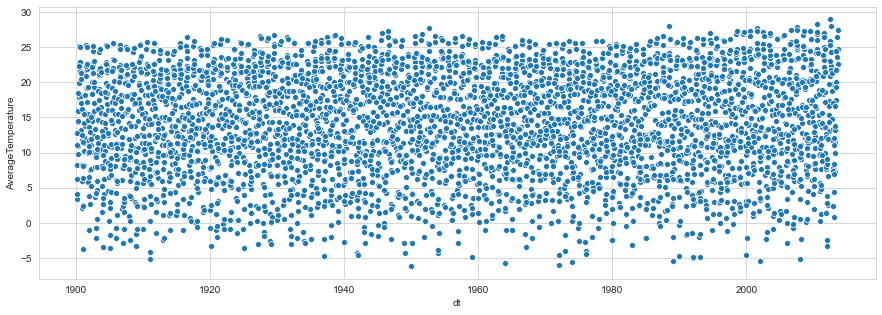

In [85]:
plt.figure(figsize = (15,5))# scatterplot da x ve y eksenlerine ne geleceği ve hangi datadan alacağı belirtilir
sns.scatterplot(x="dt",y="AverageTemperature",data=tr_data) 

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

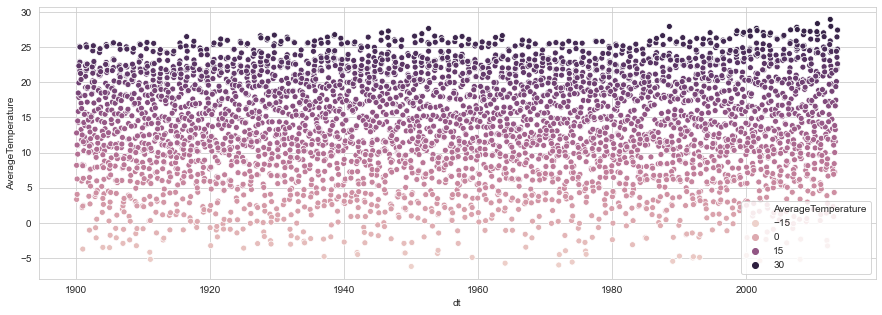

In [86]:
plt.figure(figsize = (15,5))
sns.scatterplot(x="dt",y="AverageTemperature",data=tr_data,hue = "AverageTemperature")
# sıcaklık değeri arttıkça koyulaşan bir renk olmasını sağladı hue() fonksiyonu

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

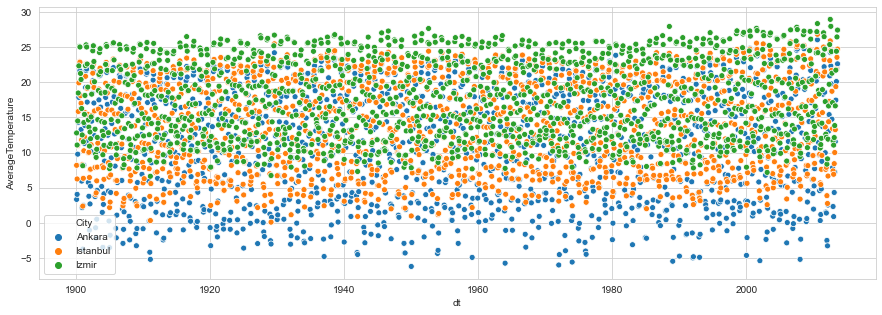

In [87]:

plt.figure(figsize = (15,5))
sns.scatterplot(x="dt",y="AverageTemperature",data=tr_data,hue = "City")

In [88]:
tr_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
13634,1900-02-01,3.339,0.733,Ankara,Turkey,39.38N,33.29E
13635,1900-03-01,4.060,0.708,Ankara,Turkey,39.38N,33.29E
13636,1900-04-01,9.777,0.594,Ankara,Turkey,39.38N,33.29E
13637,1900-05-01,14.301,0.402,Ankara,Turkey,39.38N,33.29E
13638,1900-06-01,17.860,0.509,Ankara,Turkey,39.38N,33.29E


In [89]:
tr_data_means = tr_data.groupby(tr_data["dt"].dt.to_period("Y")).mean()
tr_data_means = tr_data_means.reset_index()
tr_data_means["dt"]

0      1900
1      1901
2      1902
3      1903
4      1904
       ... 
109    2009
110    2010
111    2011
112    2012
113    2013
Name: dt, Length: 114, dtype: period[A-DEC]

In [90]:
tr_data_means["dt"] = tr_data_means["dt"].astype("string").astype("datetime64")

In [91]:
tr_data_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             114 non-null    datetime64[ns]
 1   AverageTemperature             114 non-null    float64       
 2   AverageTemperatureUncertainty  114 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.8 KB


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

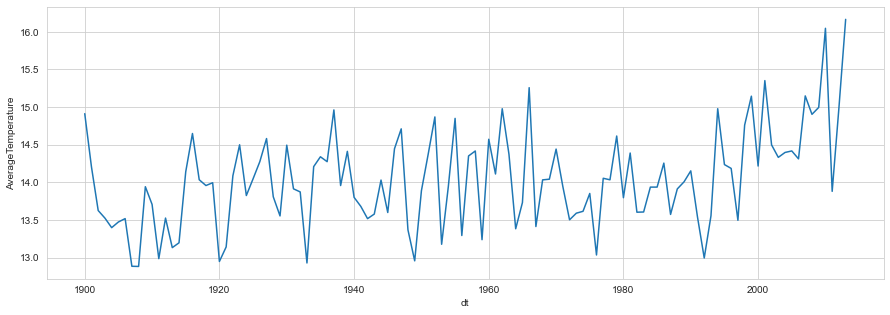

In [92]:
plt.figure(figsize = (15,5))

sns.lineplot(x = "dt", y = "AverageTemperature",data=tr_data_means)

In [93]:
### 3 ülke için de yapalım

In [97]:
data_1900 = data_selected[data_selected["dt"] > "01.01.1900"]
data_1900.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
13634,1900-02-01,3.339,0.733,Ankara,Turkey,39.38N,33.29E
13635,1900-03-01,4.060,0.708,Ankara,Turkey,39.38N,33.29E
13636,1900-04-01,9.777,0.594,Ankara,Turkey,39.38N,33.29E
13637,1900-05-01,14.301,0.402,Ankara,Turkey,39.38N,33.29E
13638,1900-06-01,17.860,0.509,Ankara,Turkey,39.38N,33.29E


In [104]:
data_mean = data_1900.groupby(["Country",data_1900["dt"].dt.to_period("Y")]).mean()
data_means = data_mean.reset_index()
data_means["dt"] = data_means["dt"].astype("string").astype("datetime64")
data_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Country                        342 non-null    object        
 1   dt                             342 non-null    datetime64[ns]
 2   AverageTemperature             342 non-null    float64       
 3   AverageTemperatureUncertainty  342 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 10.8+ KB


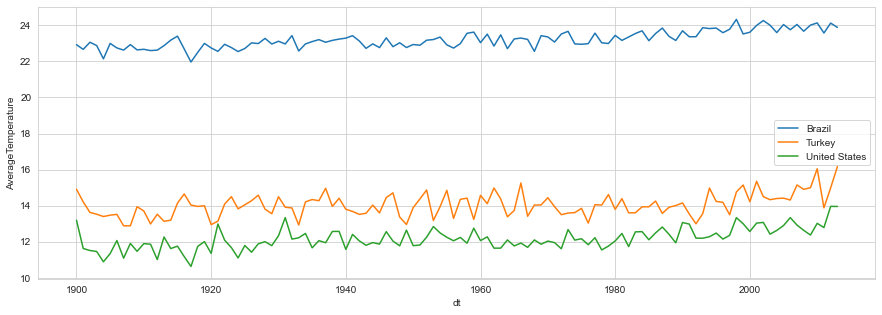

In [106]:
plt.figure(figsize = (15,5))

for country in data_means["Country"].unique():
    data = data_means[data_means["Country"] == country]
    sns.lineplot(x = "dt", y = "AverageTemperature",data=data)
    
plt.legend(data_means["Country"].unique())

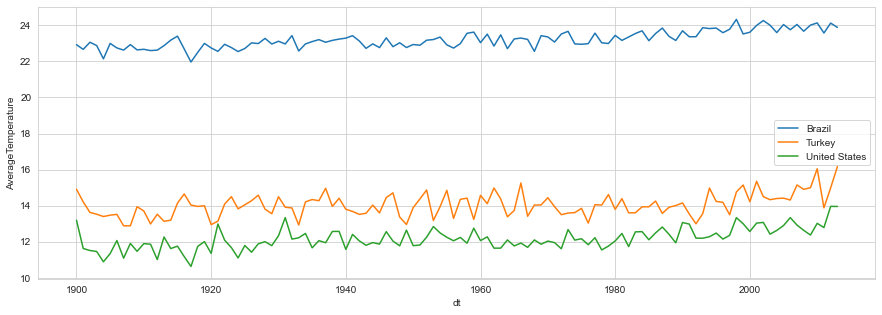

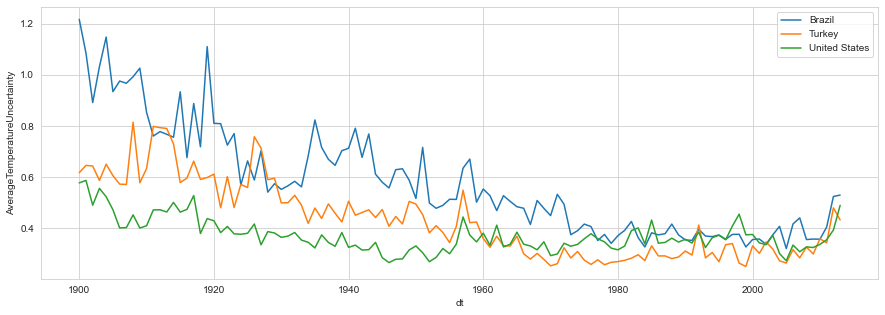

In [107]:
for col in data_means.columns[2:4]:
    
    plt.figure(figsize = (15,5))

    for country in data_means["Country"].unique():
        data = data_means[data_means["Country"] == country]
        sns.lineplot(x = "dt", y = col,data=data)

        plt.legend(data_means["Country"].unique())
    plt.show()